# Logistic Regression Lab for Data Breach Dataset
## Introduction to Machine Learning - Homework Assignment

### Overview
In this lab, you'll learn about logistic regression, a fundamental machine learning algorithm used for classification problems. You'll work with a real-world data breach dataset to build a model that predicts whether a security breach will affect a large number of individuals.

**Learning Objectives:**
- Understand what logistic regression is and when to use it
- Learn how to prepare data for machine learning
- Build and evaluate a simple logistic regression model
- Interpret the results of your model



## Part 1: Introduction to Logistic Regression

### What is Logistic Regression?
Logistic regression is a statistical method used for predicting binary outcomes (Yes/No, True/False, 0/1). Unlike linear regression which predicts continuous values, logistic regression predicts the probability that an instance belongs to a particular class.

**Examples of logistic regression applications:**
- Predicting whether an email is spam or not
- Determining if a patient has a disease based on symptoms
- Forecasting if a customer will make a purchase

### About the Dataset
The dataset you'll be working with contains information about data breaches reported to various state Attorneys General offices. Each row represents a separate breach incident with details about:
- The organization affected
- The type of breach
- When it happened
- How many individuals were affected
- What type of information was compromised

## Part 2: Data Exploration

### Loading the Data
We'll start by loading the data and examining its structure.

# Import Python libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Load the dataset
# The read_excel function loads data from Excel files
df = pd.read_csv('https://github.com/scottalanturner/AI-ML-Labs/blob/main/Logistic-Regression/data/Data_Breach_Chronology_sample.csv?raw=true', sep='|', quoting=1)

# Display the first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,id,source,org_name,acceptable_names,org_name_explanation,reported_date,breach_date,end_breach_date,incident_details,date_info_explanation,...,breach_location_city,breach_location_state,breach_location_zip,breach_location_country,breach_location_explanation,tags,source_url,notification_url_original,created_at,updated_at
0,280b456e-2397-5db7-8954-44d2d2cda55a,IN,AboundWealth-DataBreach,NaN,The Indiana Office of the Attorney General rep...,2019-01-28,2018-12-23,UNKN,The Indiana Office of the Attorney General rep...,The Indiana Office of the Attorney General rep...,...,UNKN,UNKN,UNKN,UNKN,The provided agency report does not include an...,"personal-identifiers-unknown,finance,unknown-o...",https://www.in.gov/attorneygeneral/consumer-pr...,https://www.in.gov/attorneygeneral/consumer-pr...,2025-01-19 08:44:16,2025-01-19 08:44:16
1,8a3c84d1-f48e-53a4-8396-db1024f87115,ME,"Five Guys Holdings, Inc.",Five Guys,The Maine Office of the Attorney General repor...,2018-11-30,2018-05-23,UNKN,The Maine Office of the Attorney General repor...,The Maine Office of the Attorney General repor...,...,Lorton,VA,22079,United States,The breach location is explicitly stated in th...,"90-days-or-longer-response,mass-notification,u...",https://www.maine.gov/ag/consumer/identity_the...,https://apps.web.maine.gov/ag/docs/Maine_Attor...,2025-01-19 08:47:02,2025-01-19 08:47:02
2,69c88f84-52aa-5e1e-aa95-7fce1c7e0e49,ME,Phillip Galyen P.C.,"Galyen, Galyen Law Firm",The breach was reported by the Maine Office of...,2021-05-14,2021-03,UNKN,The Maine Office of the Attorney General repor...,The Maine Office of the Attorney General repor...,...,Bedford,TX,76021,United States,The breach location is explicitly stated in th...,"law-firm,health,personal-information-accessed,...",https://www.maine.gov/agviewer/content/ag/9852...,https://www.maine.gov/ag/attachments/985235c7-...,2025-01-19 08:46:06,2025-01-19 08:46:06
3,c9ebf0b9-7234-57c4-91f5-49417e433094,ME,"Old City Coffee, Inc.","Old City Coffee, Old City",The Maine Office of the Attorney General repor...,2021-06-21,2021-02,2021-03-02,The Maine Office of the Attorney General repor...,The Maine Office of the Attorney General repor...,...,Philadelphia,PA,19106,United States,The breach location is explicitly stated in th...,"hack,retail,business-other,payment-card-inform...",https://www.maine.gov/agviewer/content/ag/9852...,https://www.maine.gov/ag/attachments/985235c7-...,2025-01-19 08:48:46,2025-01-19 08:48:46
4,da2336b1-92b5-56dc-a7f2-3d33d750c38c,VT,Cadence Bank,Cadence,The data breach notification letter clearly id...,2023-11-22,2023-05-28,2023-05-31,The Vermont Office of the Attorney General rep...,The Vermont Office of the Attorney General rep...,...,Niles,IL,60714,United States,The breach location was not explicitly stated ...,"finance,bank,hack,zero-day-exploit,moveit-data...",https://ago.vermont.gov/document/2023-11-22-ca...,https://ago.vermont.gov/sites/ago/files/docume...,2025-01-23 06:56:39,2025-01-23 06:56:39


### Understanding the Dataset
Let's look at some basic information about our dataset.

In [3]:
# Check the size of our dataset
print(f"Dataset dimensions: {df.shape[0]} rows and {df.shape[1]} columns")

# Get column names
print("\nColumn names:")
for col in df.columns:
    print(f"- {col}")

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Get summary statistics
print("\nSummary statistics for numeric columns:")
df.describe()

Dataset dimensions: 1000 rows and 37 columns

Column names:
- id
- source
- org_name
- acceptable_names
- org_name_explanation
- reported_date
- breach_date
- end_breach_date
- incident_details
- date_info_explanation
- information_affected
- information_affected_explanation
- organization_type
- organization_type_explanation
- breach_type
- breach_type_explanation
- group_uuid
- normalized_org_name
- normalized_org_name_explanation
- group_org_breach_type
- group_org_breach_type_explanation
- group_org_type
- group_org_type_explanation
- total_affected
- residents_affected
- impact_info_explanation
- breach_location_street
- breach_location_city
- breach_location_state
- breach_location_zip
- breach_location_country
- breach_location_explanation
- tags
- source_url
- notification_url_original
- created_at
- updated_at

Missing values in each column:
id                                     0
source                                 0
org_name                               0
acceptable_nam

,id,source,org_name,acceptable_names,org_name_explanation,reported_date,breach_date,end_breach_date,incident_details,date_info_explanation,...,breach_location_city,breach_location_state,breach_location_zip,breach_location_country,breach_location_explanation,tags,source_url,notification_url_original,created_at,updated_at
count,1000,1000,1000,424,1000,1000,1000,1000,1000,1000,...,1000,1000,1000,1000,1000,885,976,963,1000,1000
unique,1000,15,905,417,1000,847,486,238,1000,1000,...,177,46,223,2,1000,841,197,392,452,452
top,fe8f8d9e-5114-5be6-839e-83f61b1385fc,MA,The Village Bank,"Cencora, Lash Group",The Massachusetts Office of Consumer Affairs a...,2016-04-11,UNKN,UNKN,"On July 2, 2015, the Massachusetts Office of C...",The Massachusetts Office of Consumer Affairs a...,...,UNKN,UNKN,UNKN,UNKN,The breach notification information provided d...,"finance,sensitive-personal-information,bank,cr...",https://www.mass.gov/lists/data-breach-notific...,https://ocrportal.hhs.gov/ocr/breach/breach_re...,2025-01-19 08:46:14,2025-01-19 08:46:14
freq,1,311,9,2,1,4,434,727,1,1,...,753,638,759,746,1,9,311,108,8,8


### Data Visualization
Let's create some visualizations to better understand our data.


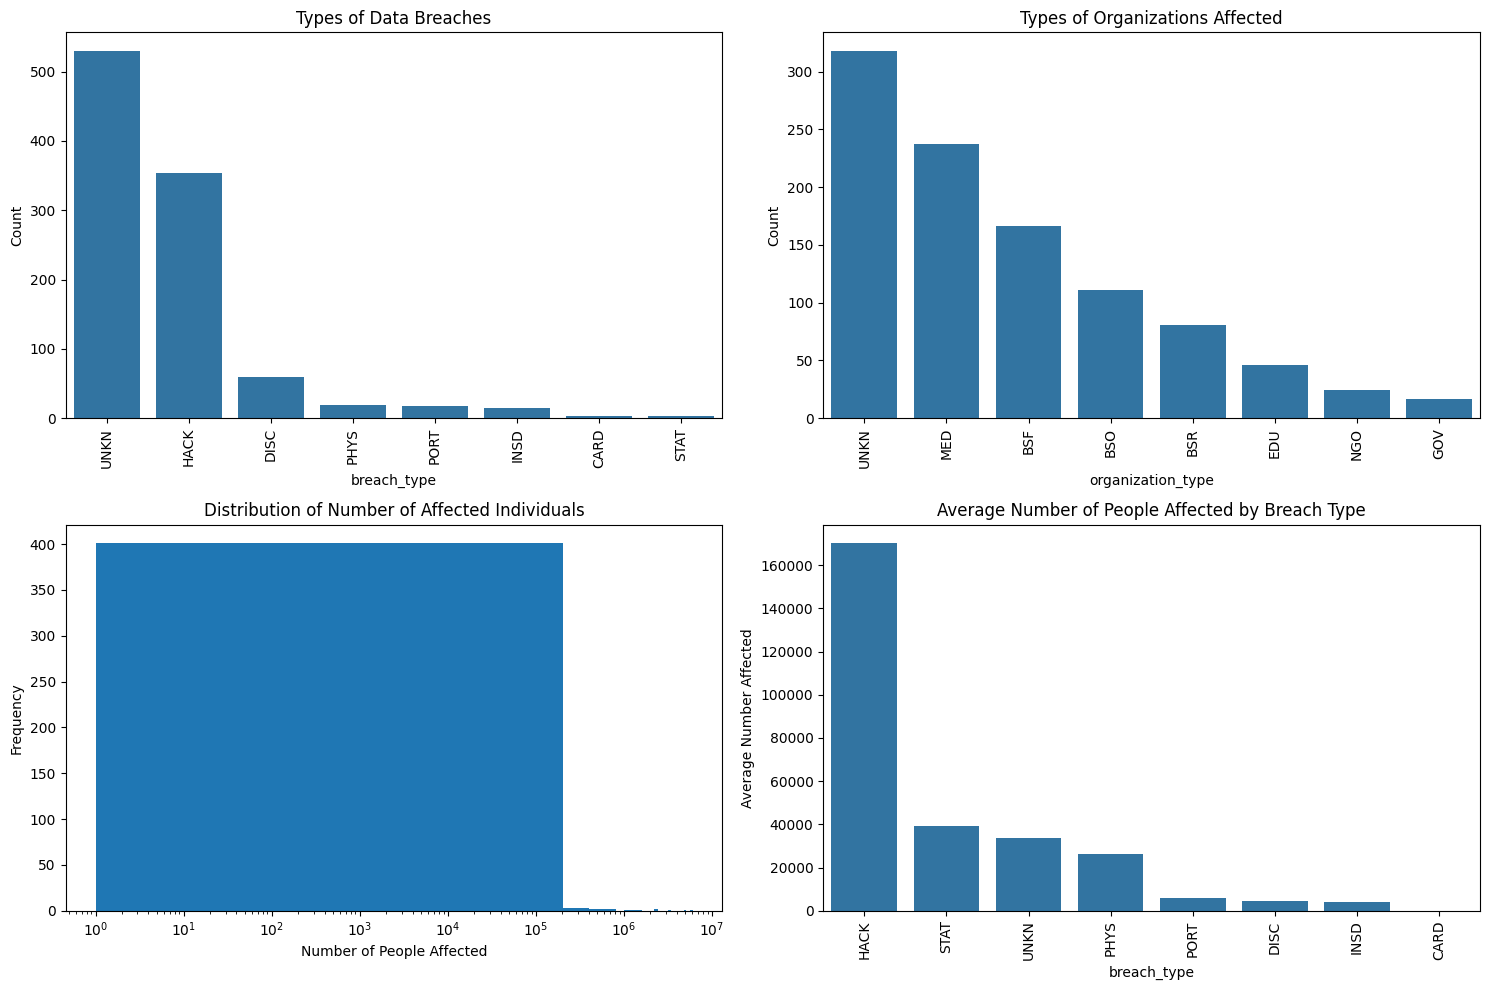

In [4]:
# Create a figure with multiple subplots
plt.figure(figsize=(15, 10))

# Plot 1: Distribution of breach types
plt.subplot(2, 2, 1)
breach_counts = df['breach_type'].value_counts()
sns.barplot(x=breach_counts.index, y=breach_counts.values)
plt.title('Types of Data Breaches')
plt.xticks(rotation=90)
plt.ylabel('Count')

# Plot 2: Distribution of organization types
plt.subplot(2, 2, 2)
org_counts = df['organization_type'].value_counts()
sns.barplot(x=org_counts.index, y=org_counts.values)
plt.title('Types of Organizations Affected')
plt.xticks(rotation=90)
plt.ylabel('Count')

# Plot 3: Number of affected individuals (log scale)
plt.subplot(2, 2, 3)
# Convert to numeric and handle non-numeric values
df['total_affected_numeric'] = pd.to_numeric(df['total_affected'], errors='coerce')
# Filter out missing values for the plot
df_filtered = df[df['total_affected_numeric'].notna()]
plt.hist(df_filtered['total_affected_numeric'], bins=30)
plt.title('Distribution of Number of Affected Individuals')
plt.xlabel('Number of People Affected')
plt.ylabel('Frequency')
plt.xscale('log')  # Use log scale for better visualization

# Plot 4: Breach type vs average number affected
plt.subplot(2, 2, 4)
breach_impact = df.groupby('breach_type')['total_affected_numeric'].mean().sort_values(ascending=False)
sns.barplot(x=breach_impact.index, y=breach_impact.values)
plt.title('Average Number of People Affected by Breach Type')
plt.xticks(rotation=90)
plt.ylabel('Average Number Affected')

plt.tight_layout()
plt.savefig('data_exploration.png')  # Save for your report
plt.show()

**Questions to consider:**
1. Which types of breaches are most common?
2. What types of organizations suffer the most breaches?
3. Is there a relationship between breach type and number of people affected?

## Part 3: Data Preparation

### Creating a Target Variable
We'll define a binary target variable for our logistic regression model: whether a breach affects a "large" number of individuals or not.


Number of large breaches: 111
Number of small breaches: 889
Percentage of large breaches: 11.10%


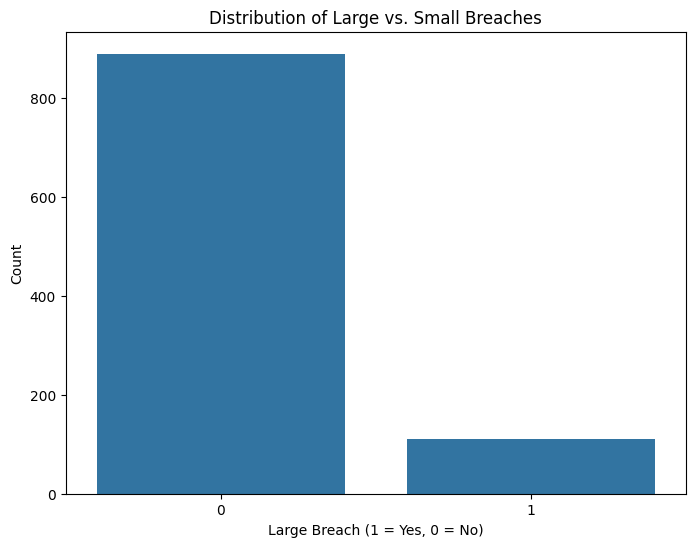

In [5]:
# Define what makes a "large" breach (more than 10,000 individuals affected)
threshold = 10000

# Create our target variable
df['large_breach'] = (df['total_affected_numeric'] > threshold).astype(int)

# Display the distribution of our target variable
print(f"Number of large breaches: {df['large_breach'].sum()}")
print(f"Number of small breaches: {len(df) - df['large_breach'].sum()}")
print(f"Percentage of large breaches: {df['large_breach'].mean() * 100:.2f}%")

# Visualize the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='large_breach', data=df)
plt.title('Distribution of Large vs. Small Breaches')
plt.xlabel('Large Breach (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.savefig('target_distribution.png')  # Save for your report
plt.show()

### Preparing Features
Now we need to prepare our feature variables (predictors) for the model.

In [6]:
# Select features we want to use for prediction
# We'll choose the breach type and organization type
selected_features = ['breach_type', 'organization_type']

# Handle non-numeric values in breach_type and organization_type
# We'll convert categorical variables to numeric using one-hot encoding
from sklearn.preprocessing import OneHotEncoder

# Select only rows with valid target values
df_model = df.dropna(subset=['large_breach'])

# Create encoder object
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop first category to avoid multicollinearity

# Apply one-hot encoding to our categorical variables
encoded_features = encoder.fit_transform(df_model[selected_features])

# Get the feature names after encoding
feature_names = encoder.get_feature_names_out(selected_features)
print("Feature names after encoding:")
print(feature_names)

# Create a DataFrame with the encoded features
X = pd.DataFrame(encoded_features, columns=feature_names)

# Define the target variable
y = df_model['large_breach']

# Show the first few rows of prepared data
X.head()

Feature names after encoding:
['breach_type_DISC' 'breach_type_HACK' 'breach_type_INSD'
 'breach_type_PHYS' 'breach_type_PORT' 'breach_type_STAT'
 'breach_type_UNKN' 'organization_type_BSO' 'organization_type_BSR'
 'organization_type_EDU' 'organization_type_GOV' 'organization_type_MED'
 'organization_type_NGO' 'organization_type_UNKN']


,breach_type_DISC,breach_type_HACK,breach_type_INSD,breach_type_PHYS,breach_type_PORT,breach_type_STAT,breach_type_UNKN,organization_type_BSO,organization_type_BSR,organization_type_EDU,organization_type_GOV,organization_type_MED,organization_type_NGO,organization_type_UNKN
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Part 4: Building the Model

### Splitting the Data
We'll split our data into training and testing sets.

In [7]:
# Import necessary function
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of our training and testing sets
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (800, 14)
Testing set shape: (200, 14)


### Creating and Training the Model

In [8]:
# Import the logistic regression model
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression(random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

# Display the model coefficients
print("Model coefficients:")
for feature, coefficient in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coefficient:.4f}")

# Display the intercept
print(f"Intercept: {model.intercept_[0]:.4f}")

Model coefficients:
breach_type_DISC: -0.4668
breach_type_HACK: 0.5745
breach_type_INSD: 0.1473
breach_type_PHYS: -0.3099
breach_type_PORT: -0.3620
breach_type_STAT: 0.4750
breach_type_UNKN: 0.0093
organization_type_BSO: 0.5194
organization_type_BSR: -0.2664
organization_type_EDU: -0.0977
organization_type_GOV: 0.5536
organization_type_MED: 1.5288
organization_type_NGO: -0.0918
organization_type_UNKN: 0.4536
Intercept: -3.0345


**Understanding Model Coefficients:**
- **Positive coefficients**: Indicate features that increase the probability of a large breach
- **Negative coefficients**: Indicate features that decrease the probability of a large breach
- **Larger magnitude**: Indicates a stronger effect

## Part 5: Evaluating the Model

### Making Predictions

In [9]:
# Use the model to make predictions on the test set
y_pred = model.predict(X_test)

# Compare the first few actual values vs. predictions
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print("First 10 actual vs predicted values:")
print(comparison.head(10))

First 10 actual vs predicted values:
   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          0
4       0          0
5       0          0
6       0          0
7       0          0
8       0          0
9       1          0


### Model Accuracy


Model accuracy: 0.8750 (87.50%)


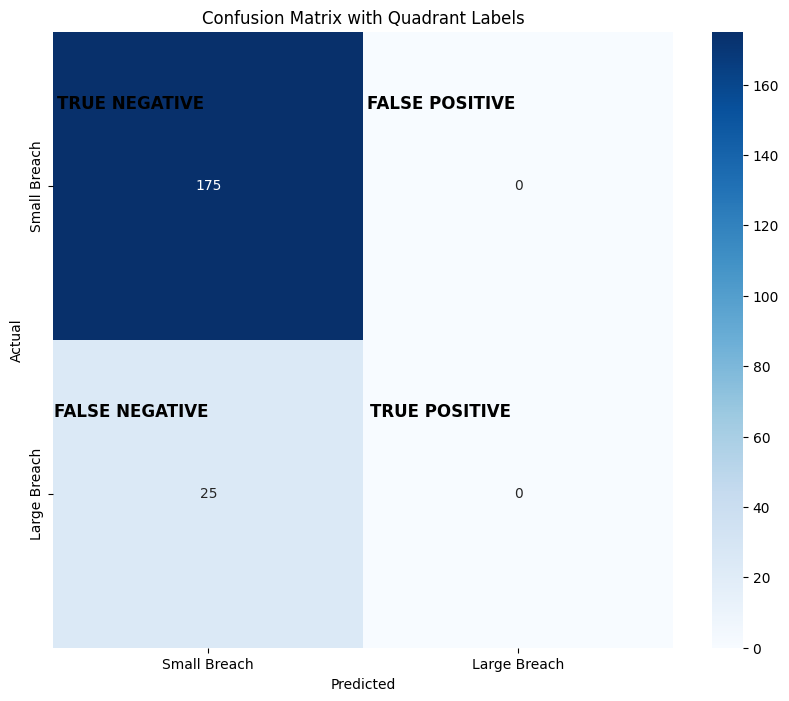


Understanding the Confusion Matrix:
- TRUE NEGATIVE (TN): Correctly predicted Small Breach
- FALSE POSITIVE (FP): Incorrectly predicted Large Breach when actually Small
- FALSE NEGATIVE (FN): Incorrectly predicted Small Breach when actually Large
- TRUE POSITIVE (TP): Correctly predicted Large Breach

Accuracy: 0.8750
Error Rate: 0.1250


In [10]:
# Import necessary metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Display confusion matrix with labeled quadrants
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a figure
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Small Breach', 'Large Breach'],
            yticklabels=['Small Breach', 'Large Breach'])

# Add quadrant labels with arrows
plt.text(0.25, 0.25, "TRUE NEGATIVE", horizontalalignment='center',
         size=12, color='black', weight='bold')
plt.text(1.25, 0.25, "FALSE POSITIVE", horizontalalignment='center',
         size=12, color='black', weight='bold')
plt.text(0.25, 1.25, "FALSE NEGATIVE", horizontalalignment='center',
         size=12, color='black', weight='bold')
plt.text(1.25, 1.25, "TRUE POSITIVE", horizontalalignment='center',
         size=12, color='black', weight='bold')

# Labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Quadrant Labels')
plt.savefig('confusion_matrix.png')  # Save for your report
plt.show()

# Add explanation for students
print("\nUnderstanding the Confusion Matrix:")
print("- TRUE NEGATIVE (TN): Correctly predicted Small Breach")
print("- FALSE POSITIVE (FP): Incorrectly predicted Large Breach when actually Small")
print("- FALSE NEGATIVE (FN): Incorrectly predicted Small Breach when actually Large")
print("- TRUE POSITIVE (TP): Correctly predicted Large Breach")
print(f"\nAccuracy: {(conf_matrix[0,0] + conf_matrix[1,1])/conf_matrix.sum():.4f}")
print(f"Error Rate: {(conf_matrix[0,1] + conf_matrix[1,0])/conf_matrix.sum():.4f}")

**Understanding the Confusion Matrix:**
- **True Positives (TP)**: Correctly predicted large breaches
- **True Negatives (TN)**: Correctly predicted small breaches
- **False Positives (FP)**: Small breaches incorrectly predicted as large
- **False Negatives (FN)**: Large breaches incorrectly predicted as small

**Understanding Classification Metrics:**
- **Precision**: Percentage of predicted large breaches that are actually large
- **Recall**: Percentage of actual large breaches that were correctly identified
- **F1-score**: Harmonic mean of precision and recall

## Part 6: Conclusion and Reflection

### Model Interpretation

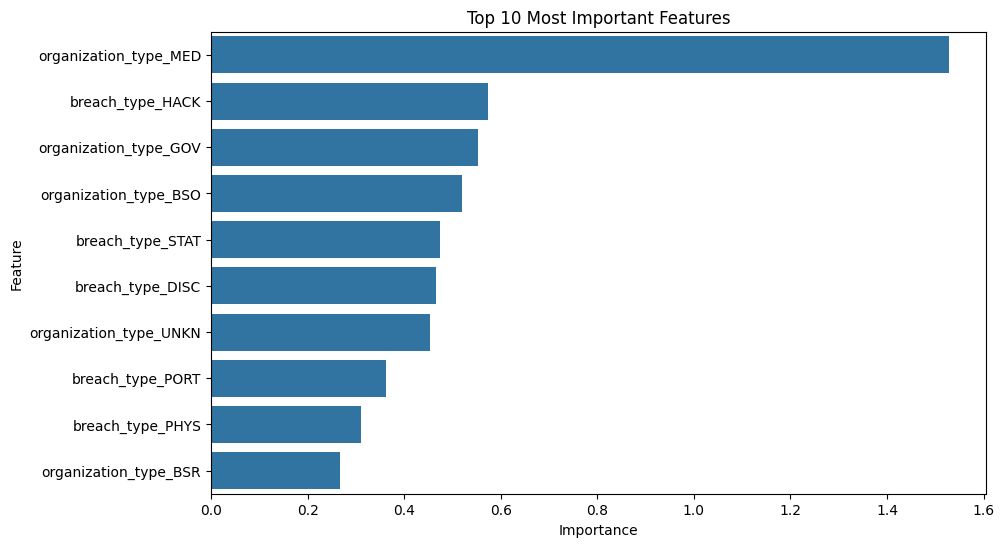

In [11]:
# Let's see which features are most important
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.savefig('feature_importance.png')  # Save for your report
plt.show()

### Reflection Questions
Take some time to reflect on the following questions:

1. What does our logistic regression model predict in this context?
2. Which features have the strongest influence on whether a breach will be large?
3. What are the limitations of our model?
4. How could we improve the model's performance?
5. What other questions could we answer with this dataset?

## Homework Deliverables

Please submit the following:

1. **Written responses (3-5 sentences each):**
   - Type your responses in THIS notebook, by adding markdown cells. Answer each question:
   - What does logistic regression predict in this context?
   - Which features seem most important in predicting large breaches?
   - What are the limitations of this model? HINT: There is a problem with the accuracy of this model
   - How might organizations use this information to improve security?

2. **This completed Jupyter Notebook in your Git repo**
   - Run all cells and export/download the notebook as .ipynb
   - Include all outputs, especially visualizations
   - Add the Jupyter notebook to your repo



1.   In this context logistic regression predicts whether a data breach is large or small. In order to determine that it looks at details like how things were stolen or how the breach happened. Then basically it gives a yes or no type of prediction to help us understand the chances of it happening again.
2.   A couple of features that seem most important is the number of records exposed and the type of data stolen. These features help us see if a is likely and the cause of the breach.

3.   The most obvious limitation is that it assumes a "straight line relationship," which in real life isn't always true. The model will since it looks very linear at the issues, thinking that small reaches our most when it could really be a big breach.

4.   Despite answer to question 3 this module is very helpful to organizations because it's able to see what factors make big breaches more likely and it analyzes this without human error. Using this will also track data for over long periods of time, so then they can see what they would need to put their security in because you can now see the highest risk.



